# 00 Orientation

* [What is a programming language?](#What-is-a-programming-language?)
* [The concept of an Abstract Syntax Tree (AST)](#The-concept-of-an-Abstract-Syntax-Tree-(AST))
* [Represneting trees in Haskell](#Represneting-trees-in-Haskell)
* [Defining names for Haskell expressions](#Defining-names-for-Haskell-expressions)
* [Implementing an interpreter as an Haskell function](#Implementing-an-interpreter-as-an-Haskell-function)
* [Haskell and Functional Programming](#Haskell-and-Functional-Programming)

----
## What is a programming language?
(프로그래밍 언어란?)

![장님 코끼리 만지기](https://ritnikotkata.com/files/mf/news_pages/284_picture_news_pages_orig.jpg)

많은 프로그래밍 언어가 개발되었고 프로그래밍 언어의 용도도 다양한 관점에서 생각해 볼 수 있다.

 * 기계에게 지시를 내리기 위한 도구
 * 프로그래머들끼리 생각을 교환하기 위한 방법
 * 추상적인 SW 디자인을 구체적으로 표현하기 위한 기법
 * 알고리듬을 기술하기 위한 표기법
 * 아이디어를 실험/시뮬레이션/구현하기 위한 도구
 * ...


### 프로그래밍 언어를 바라보는 관점을 대략 두가지로 나누자면

<img src="https://storage.needpix.com/rsynced_images/baby-2709666_1280.jpg" width="330px" alt="궁금한 아기" /><br>
요즘 주변에 보니까 컴퓨터라는 기계를 많이들 쓰고 있던데,
그런 거 돌리려고 프로그래밍 언어를 만든 거 같아?
아마도 ... 그렇겠지?


<img src="https://i.ibb.co/9nSw2rz/SICP-cover.jpg" alt="SICP-cover" width="330px">
프로그래밍 언어(형식언어)를 효과적으로 (빠르고 정확하게) 돌리기 위해
컴퓨터라는 기계가 만들어진 것이다!
역사적으로 그러하다.

### 그럼 최초의 프로그래밍 언어(형식언어)와 최초의 컴퓨터라고 할만한 건 뭘까?

최초의 형식언어는 숫자를 동굴 벽 등에 빗금으로 그어 표시하던 즉 "개수"와 그 계산에 대한 것이 최초의 형식언어 즉 프로그래밍 언어라고 볼 수 있겠다.

그런 면에서 최초의 컴퓨터에 해당하는 것은 주판으로 볼 수 있을 것이다.

<img alt="로마 주판" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Roman_tablet_employed_in_making_arithmetical_calculations_%2814781129921%29.jpg/559px-Roman_tablet_employed_in_making_arithmetical_calculations_%2814781129921%29.jpg" width="330px">
(로마 주판)

그 다음에 기계식 컴퓨터가 나오고, 또 그 다음 전자 컴퓨터가 나오고, 요즘은 양자 컴퓨터인가 하는 것을 또 만들고 있다고 ...

이렇게 기계(HW)의 재료는 변화하고 성능은 분명히 엄청나게 발전하여 더욱 효과적인 계산을 도와주고 있다.

그런데 우리가 돌리고자 하는 내용(SW)을 작성하기 위한 프로그래밍 언어의 원리 자체는 아직 근본적으로 크게 변했다고 보기는 어렵다.

이러한 원리를 이해하고 다양하게 응용할 수 있는 기초적인 지식과 역량을 습득하는 것이 컴퓨터 관련 전공에서 프로그래밍 언어를 주제로 하는 전공 과목의 취지이다.

----
## The concept of an Abstract Syntax Tree (AST)

추상문법나무(Abstract Syntax Tree)의 개념에 대해 산술식을 예로 들어 알아보겠다.

산술연산이 있는 수식, 즉 산술식(arithmetic expressions)은 초등학교 때부터 봐서 익숙할 것이다.
우리는 종이에 수식을 왼쪽에서 오른쪽으로 한줄로 써나가지만 거기에는 분명히 구조가 있다.
예를 들어 덧셈, 뺄셈보다 곱셈, 나눗셈이 더 강하게 결합하는 연산자 우선순위가 있으며
연산자 우선순위가 같은 연산자가 나열되면 왼쪽에서부터 결합한다. 연산자 결합의 순서를
강제하기 위해 괄호를 치기도 한다.

이런 수식을 컴퓨터로 자동으로 처리하기 편하게 보통 나무(tree) 구조로 바꿔놓고 처리한다.

예를 들어 `9 - 2 * (1 + 3)`를 나무 구조로 나타내면 다음과 같다.

````
   -
 /   \
9     *
     / \
    2   +
       / \
      1   3
````


우리가 일렬로 적는 수식에는 괄호 그러니까 `(`와 `)`를 적고 있는데<br>
나무 구조로 나타낼 때는 이런 괄호는 나타나지 않는다.
왜 그럴까?

참고로 우리가 글자 하나하나를 일렬로 나열하며 수식을 적어가기 위한 문법을
**구체적 문법**(concrete syntax)라고 한다.
이러한 구체적 문법에는 괄호, 연산자 우선 순위 등의 내용이 포함된다. 

컴퓨터로 처리하기 좋게 간단한 나무 구조로 나타낸 것을 **추상적 문법**(abstract syntax)이라고 한다.
문법분석을 통해 얻어진 이러한 나무 구조를 **추상문법나무**(abstract syntax tree, 줄여서 AST)라고 한다.

----
우리가 수업에 활용할 하스켈 프로그래밍 언어를 포함한 대부분의 프로그래밍 언어에서 수식을 활용할 수 있다.

In [1]:
9 - 2 * (1 + 3)

1

----
이렇게 프로그래밍언어가 수식 혹은 일반적으로 식(expression)을 처리하는 방식은 크게 두 단계로 나눠서 생각해 볼 수 있다.<br>
(물론 아래 단계 1과 2사이에 의미분석 등 여러 가지 다양한 처리도 가능하지만 여기서는 가장 기본적인 것만 ...)

 1. 문법분석(parsing) 단계: 구체적 문법에 따라 작성된 string을 입력으로 받아 추상문법나무(AST)로 변환
 2. 값 계산(evaluation) 단계: 추상문법나무(AST)를 그 의미(semantics)에 맞게 계산해 값을 구함
 
이 수업에서는 문법분석 단계는 처리되었다고 가정하고 이미 AST가 주어진 상태에서 값 계산을 하는 과정을 주로 알아본다.


그러니까 만일 **우리가 직접 프로그래밍 언어를 구현해야 한다면** 2번 단계를 **어떤 식으로 생각을 정리해서 프로그램으로 작성하면 될지** 알아보는 수업이라고 생각하면 대략 맞다. 프로그래밍 언어의 기능을 구현해서 프로그램으로 작성한다는 말은 인터프리터 또는 컴파일러를 만든다는 이야기라고 보면 되는데 컴파일러는 컴파일러 수업이 따로 있으니 이 수업에서는 인터프리터를 여러 번 작성해 보게 될 것이다.

----
## Represneting trees in Haskell

하스켈에서는 위와 같은 `Expr` 데이타 타입을 정의함으로써 정수, 덧셈, 뺄셈, 곱셈으로 이루어진 4칙연산에서 하나 모자란 3칙연산 수식에 대한 AST를 나타낼 수 있다.
참고로 AST가 아닌 일반적인 나무도 이와 같이 다루려는 나무의 구조적 특성을 잘 요약하는 `data` 타입을 정의함으로써 하스켈 프로그래밍 언어로 다룰 수 있다. 

In [2]:
data Expr = Val Int        -- 정수 "n"으로만 이루어진 식을 Val n으로 나타냄
          | Add Expr Expr  -- 덧셈식 "e1 + e2"를 Add e1 e2로 나타냄
          | Sub Expr Expr  -- 뺄셈식 "e1 - e2"를 Sub e1 e2로 나타냄
          | Mul Expr Expr  -- 곱셈식 "e1 * e2"를 Mul e1 e2로 나타냄
        deriving (Eq,Ord,Show) -- 동치, 순서, 출력을 위한 문자열 변환 관련 연산을 자동으로 정의

다음은 `9 - 2 * (1 + 3)`을 Expr 타입의 하스켈 프로그램 식으료 표현한 것이다. 

In [3]:
Sub (Val 9) (Mul (Val 2) (Add (Val 1) (Val 3)))

Sub (Val 9) (Mul (Val 2) (Add (Val 1) (Val 3)))

In [4]:
-- 구조가 잘 드러내기 위해 똑같은 식을 여러 줄에 걸쳐 들여쓰며 작성 가능
Sub (Val 9)
    (Mul (Val 2)
         (Add (Val 1)
              (Val 3)))

Sub (Val 9) (Mul (Val 2) (Add (Val 1) (Val 3)))

In [5]:
-- 한줄로 적은 식과 여러 줄에 걸쳐 들여쓴 식을 비교 연산으로 계산해 보면 결과가 True임을 확인할 수 있다
Sub (Val 9) (Mul (Val 2) (Add (Val 1) (Val 3))) == Sub (Val 9)
                                                       (Mul (Val 2)
                                                            (Add (Val 1)
                                                                 (Val 3)))

True

위의 하스켈 프로그램 식의 나무 구조를 그림으로 나타내자면 다음과 같다.

````
     Sub                   
   /     \              
Val       Mul                 
 |       /   \             
 9    Val     Add            
       |     /   \        
       2   Val   Val  
            |     |  
            1     3  
````

맨 앞에 수식을 보고 나무(아래에 복사해 놓음)로 나타냈던 것과 차이점은 무엇인가?

````
   -
 /   \
9     *
     / \
    2   +
       / \
      1   3
````



일단 `+`, `-`, `*` 기호 대신에 하스켈 데이타 타입에 정의된 `Add`, `Sub`, `Mul`라는 상수 이름을 쓰고 있는 점이 물론 다르다.
하지만 이것은 구조적인 차이는 아니다. 단지 이름을 다르게 붙였을 뿐이다.

맨 앞에서 보았던 나무에는 없던 `Val`이라는 상수가 정수 위에 하나씩 더 있다.
`Val`이 나무 구조에서 하는 역할은 무엇일까 생각해 보라.

In [6]:
-- Expr 데이타 타입에서 정의된 상수의 타입을 컴파일러에게 물어보기
:type Val
:type Add

Val :: Int -> Expr

Add :: Expr -> Expr -> Expr

In [7]:
-- 상수가 아닌 하스켈 프로그램 식의 타입도 컴파일러에게 물어볼 수 있다
:type Val 1
:type Val 3
:type Add (Val 1) (Val 3)

Val 1 :: Expr

Val 3 :: Expr

Add (Val 1) (Val 3) :: Expr

----
## Defining names for Haskell expressions

하스켈 프로그래밍에 대한 내용은 수업 중간중간에 필요한 내용을 다루겠지만 기본적인 것 중에 하나인
변수의 타입 선언과 정의에 대해 살펴보자.
아래와 같이 `1`, `2`와 같이 더 이상 계산할 겂 없는 정수값
또는 `1 + 2` 처럼 더 진행할 수 있는 하스켈 문법과 의미에 맞게 작성된 식(expression)에 이름을 붙일 수 있다.

In [8]:
-- 이렇게 두 줄에 할 수도 있고
n1 :: Int -- 변수 n1의 타입 선언
n1 = 1    -- 변수 n1의 정의

n2 :: Int
n2 = 2

-- 이렇게 번수의 타입 선언 없어 정의식의 끝에 이렇게 타입을 적어 주어도 된다
n3 = 1 + 2 :: Int

하스켈은 타입을 적어주지 않아도 많은 경우에 컴파일러가 프로그램 식의 타입을 알아낼 수 있도록 설계된 언어이다.
이러한 기능을 **타입 유추**(type inference)라고 한다.

In [9]:
-- 타입을 적어주지 않아도 컴파일러가 타입을 유추한다
e1 = Val 9
e2 = Add (Val n1) (Val n3)
e3 = Sub e1 (Mul (Val n2) e2)

In [10]:
-- 컴파일러에게 타입을 물어보면 Expr이라는 것을 알고 있다
:type e1
:type e2
:type e3

e1 :: Expr

e2 :: Expr

e3 :: Expr

In [11]:
-- 하스켈은 타입을 엄격히 검사하므로 잘못된 타입을 적어주면 컴파일러가 타입 오류 메시지를 낸다
e1' :: Int
e1' = Val 9

: 

In [12]:
-- 아귀가 맞지 않는 타입의 식을 작성하면 컴파일러가 타입을 유추하다가 오류 메시지를 낸다
e2' = Add n1 n3

: 

----
## Implementing an interpreter as an Haskell function

인터프리터는 나무구조로 된 수식(`Expr`)을 정수(`Int`) 값으로 계산하는 재귀함수로 작성할 수 있다.


In [13]:
eval :: Expr -> Int
eval (Val n)     = n
eval (Add e1 e2) = undefined
eval (Sub e1 e2) = undefined
eval (Mul e1 e2) = undefined

계산과정을 생각해 보면 다음과 같다.
````haskell
  eval( Sub (Val 9)       ( Mul (Val 2)       (Add (Val 1)       (Val 3)) ) )
=       eval(Val 9) - eval( Mul (Val 2)       (Add (Val 1)       (Val 3)) )
=                9  -       eval(Val 2) * eval(Add (Val 1)       (Val 3))
=                9  -                2  *    ( eval(Val 1) + eval(Val 3) )
=                9  -                2  *    (          1  +          3  )
=                9  -                2  *    4
=                9  -                8
= 1
````

인터프리터의 핵심 개념 자체는 복잡하지 않다. ADT를 값으로 계산하는 함수가 바로 인터프리터인 것이다.

물론 eval 함수를 이렇게 간단히 작성할 수 있는 이유는 우리가 지금 다루는 대상 언어(정수와 3개의 연산으로 이루어진 수식)가 워낙 간단하기 때문이다.

하지만 우리가 평소에 사용하는 프로그래밍 언어들은 정수와 산술연산 이외에도 변수, 함수 등 더 많은 다양한 기능을 포함하고 있다.

이러한 기능이 추가된다면 인터프리터를 어떻게 작성하면 될까? 이것을 이번 수업을 통해 알아볼 것이다.

----
## Haskell and Functional Programming

하스켈은 **함수형 프로그래밍**(functional programming) 패러다임을 잘 지원하는 순수 함수형 프로그래밍 언어(purely functional programming language)이다.

방금 위에서 `eval`을 작성하는 것처럼 함수를 정의함으로써 프로그래밍을 해 나가는 것이 대략 함수형 프로그래밍이라고 보아도 크게 틀리지 않다.

하스켈과 같은 함수형 프로그래밍 언어는 나무구조를 따라 재귀함수를 작성하는 것이 매우 편하고 자연스러운 프로그래밍 언어이다.
그러므로 AST를 다루는 인터프리터를 작성해 보며 프로그래밍 언어의 내부 동작 개념에 대해 이해하기 위한 수업 내용에 가장 적합한 유형의 언어라서
아마도 여러분들이 어디서 들어보기는 했지만 실제로 프로그래밍을 해보는 것은 거의 처음인 하스켈로 수업을 진행하는 것이다.

함수형 프로그래밍에 익숙해지는 것은 이 수업의 내용을 효과적으로 이해하기 위해서만 좋은 것이 아니다.

SW관련 전공자라면 이제는 누구나 갖추어야 할 기본적인 소양이기 때문에 이번 수업을 통해 자신의 것으로 만들 필요가 있다.

함수형 프로그래밍이란 무엇인지에 대해 조금 우리 더 자세히 알아보려면 우리 주교재 및 아래 자료 등을 참고할 것.

* [함수형 프로그래밍이 뭔가요?](https://youtu.be/jVG5jvOzu9Y) - *알팍한 코딩사전* 유투브 채널
* [변화하는 프로그래밍 언어, '함수형 프로그래밍'이 뜬다](https://spri.kr/posts/view/22867) - *월간 SW중심사회* 2020년 6월호, 소프트웨어정책연구원(SPRi)


**프로그래밍 패러다임**(programming paradigm)이란 어떤 방식으로 프로그래밍에 접근할 것인지의 관점이다.
 - 명령형(imperative) 프로그래밍
 - 객체지향(object-oriented) 프로그래밍
 - 함수형(functional) 프로그래밍
 - 논리(logic) 프로그래밍

보편적으로 많이 알려지고 활용되는 4가지 굵직한 프로그래밍 패러다임은 위와 같다.
참고로 이 외에도 굉장히 다양한 프로그래밍 패러다임이 존재한다.

어떤 언어가 특정 패러다임을 잘 지원하는 경우에 그 패러다임을 이름을 수식어로 붙인 프로그래밍 언어로 분류한다.
 - 객체지향 프로그래밍 패러다임을 잘 지원하도록 설계된 Java, C++, C# 등은 *객체지향 프로그래밍 언어*
 - 함수형 프로그래밍 패러다임을 잘 지원하도록 설계된 Haskell, OCaml, F# 등은 *함수형 프로그래밍 언어*
 - 논리 프로그래밍 패러다임을 잘 지원하도록 설계된 Prolog 등은 *논리 프로그래밍 언어*

이런 식으로 분류한다.

참고로 최근에는 여러 프로그래밍 패러다임을 동시에 지원하는 언어들이 늘어나는 추세다.
예를 들면 기존에 객체지향 패러다임만을 지원하도록 설계된 언어에 함수형 패러다임을 지원하는 기능을 추가한다거나,
아니면 최근에 새로 만들어지는 언어들 중에는 애초에 두 가지 이상의 프로그래밍 패러다임을 활용할 수 있도록 설계하는 경우도 있다.
이런 언어들은 *다중 패러다임 프로그래밍 언어*(multi-paradigm programming language)라 일컫는다.

그러므로 21세기에 앞으로 졸업하고 개발자 등 SW관련 분야로 진출하려는 사람들은 함수형 프로그래밍에 대한 이해가 기본 소양으로 요구된다.
이는 마치 C++이나 Java 등의 언어가 현업에서 큰 영향을 미치기 시작한 90년대 후반부터
관련 업계에서 객체지향 프로그래밍이 기본적 소양이 되어 버린 것과 유사한 시대적 변화가 일어나고 있다.
함수형 프로그래밍은 객체지향 프로그래밍보다 오래 된 프로그래밍 패러다임으로 특정 함수형 프로그래밍 언어나 기술이 업계의 인식이나 요구를 단기간에 변화시킨 것은 아니다.
컴퓨팅 환경의 변화, 병렬/비동기 프로그래밍 활용의 증가, SW의 오류 방지를 위한 코드의 명확성을 요구하는 분야 확대 등 장기간에 걸친 다양한 변화를 경험하면서
명령형과 객체지향 프로그래밍 패러다임 만으로는 효과적으로 SW를 작성하는 데 한계를 느끼게 되어 다른 프로그래밍 패러다임에서 대안을 찾기 시작하며
서서히 스며들듯 활용이 늘어나다가 다중 패러다임 언어들이 늘어나며 특히 최근 10년 정도 사이에 함수형 프로그래밍의 대중화 속도가 급격하게 가속이 붙은 것으로 보인다.

----
이후의 내용은 그냥 나무 구조를 하스켈 프로그램으로 자동으로 그려본 것이다.

앞으로 아래의 `expr2tree` 정도의 함수를 편하게 이해하고 작성할 수 있는 정도가 되는 것이 이 수업의 목표 중 하나이다.

In [14]:
import Data.Tree -- Tree 타입 및 관련 기능 라이브러리

-- 참고로 Tree는 rose tree라는 나무 구조를 표현한 타입으로 대략 다음과 같이 정의되어 있다
-- 
-- data Tree a = Node a [Tree a]
--

expr2tree (Val n)     = Node "Val" [leaf (show n)]
expr2tree (Add e1 e2) = Node "Add" [expr2tree e1, expr2tree e2]
expr2tree (Sub e1 e2) = Node "Sub" [expr2tree e1, expr2tree e2]
expr2tree (Mul e1 e2) = Node "Mul" [expr2tree e1, expr2tree e2]

leaf x = Node x []

In [15]:
e3

Sub (Val 9) (Mul (Val 2) (Add (Val 1) (Val 3)))

In [16]:
:type expr2tree -- 산술식(Expr)을 문자열에 대한 rose tree 구조(Tree String)로 변환
:type drawTree  -- 문자열에 대한 rose tree 구조(Tree String)를 텍스트 그림 문자열(String)로 변환
:type putStrLn  -- 주어진 문자열(String)을 출력하고 줄바꿈하는 입출력 동작

expr2tree :: Expr -> Tree [Char]

drawTree :: Tree String -> String

putStrLn :: String -> IO ()

In [17]:
drawTree(expr2tree e3) -- 출력하면 가로 방향 나무 그림이 나오는 문자열 계산

"Sub\n|\n+- Val\n|  |\n|  `- 9\n|\n`- Mul\n   |\n   +- Val\n   |  |\n   |  `- 2\n   |\n   `- Add\n      |\n      +- Val\n      |  |\n      |  `- 1\n      |\n      `- Val\n         |\n         `- 3\n"

In [18]:
putStrLn(drawTree(expr2tree e3)) -- 텍스트로 가로 방향으로 그린 나무 출력

Sub
|
+- Val
|  |
|  `- 9
|
`- Mul
   |
   +- Val
   |  |
   |  `- 2
   |
   `- Add
      |
      +- Val
      |  |
      |  `- 1
      |
      `- Val
         |
         `- 3

In [19]:
{-# LANGUAGE FlexibleContexts #-}
import Diagrams.Prelude
import Diagrams.TwoD.Layout.Tree
import IHaskell.Display.Diagrams

renderExpr e =
  renderTree ((<> rect 2.25 1.5 # fc white # lc white) . text)
             (~~)
             (symmLayout' (with & slHSep .~ 4.75 & slVSep .~ 2.25) 
                          (expr2tree e))
  # centerXY # pad 1.05

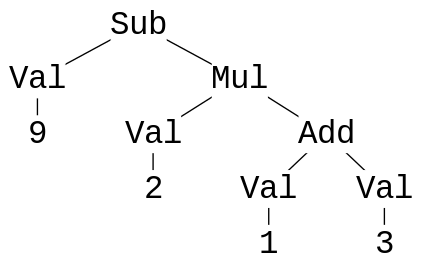

In [20]:
diagram(renderExpr e3) -- 그래픽으로 세로 방향으로 그린 나무

----
# 과제 HW01 (총 1점)

* 이름: ???
* 학번: ????????

주피터 노트북으로 하스켈을 실행할 수 있는 환경을 마련하여 앞으로의 수업에 대비하기 위한 과제이다.

`(9 - 2) * (1 + 3)`을 나타내는 `Expr` 타입의 추상문법나무 `e4`를 정의하여

(아래의 `undefined` 자리에 작성하면 된다)

`diagram`과 `renderExpr` 함수로 자동으로 그려지는 나무 그림이 나타나도록 해보라

In [21]:
e4 = undefined -- 여기에 작성

diagram(renderExpr e4)

: 